<a href="https://colab.research.google.com/github/Aadhil21/DSGP-Group28/blob/branch-Aadhil/Analyze_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [99]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [100]:
video_name = 'PushUp.mp4'
video_path = '/content/DSGP-Group28/Videos/' + video_name
dataset_path = '/content/DSGP-Group28/Datasets/'

##Read keypoints data

In [101]:
df = pd.read_excel('/content/pose_landmark_data_PushUp.mp4.xlsx')

##Remove z keypoints

In [102]:
for i in df.columns:
  if i.split('_')[-1] == 'z':
    df.drop(i, axis=1, inplace=True)

In [103]:
df.head()

,Frame_Number,NOSE_Point_x,NOSE_Point_y,LEFT_EYE_INNER_Point_x,LEFT_EYE_INNER_Point_y,LEFT_EYE_Point_x,LEFT_EYE_Point_y,LEFT_EYE_OUTER_Point_x,LEFT_EYE_OUTER_Point_y,RIGHT_EYE_INNER_Point_x,...,RIGHT_ANKLE_Point_x,RIGHT_ANKLE_Point_y,LEFT_HEEL_Point_x,LEFT_HEEL_Point_y,RIGHT_HEEL_Point_x,RIGHT_HEEL_Point_y,LEFT_FOOT_INDEX_Point_x,LEFT_FOOT_INDEX_Point_y,RIGHT_FOOT_INDEX_Point_x,RIGHT_FOOT_INDEX_Point_y
0,1,0.750996,0.324665,0.762986,0.291943,0.765581,0.289731,0.768028,0.287403,0.751887,...,0.159519,0.588731,0.157737,0.568173,0.129463,0.576126,0.163169,0.664007,0.131195,0.685615
1,2,0.753020,0.326853,0.765138,0.292967,0.767444,0.290580,0.769665,0.288012,0.753956,...,0.157601,0.574179,0.280261,0.635520,0.129155,0.560890,0.330864,0.725433,0.144963,0.688098
2,3,0.753107,0.341698,0.765681,0.306846,0.768010,0.304514,0.770202,0.301891,0.753992,...,0.157149,0.568427,0.672936,0.821891,0.129880,0.559137,0.779228,0.855109,0.143371,0.636390
3,4,0.754529,0.354579,0.767220,0.320601,0.769679,0.318162,0.771876,0.315339,0.755057,...,0.157133,0.566905,0.700569,0.825870,0.132753,0.560105,0.791971,0.857060,0.142371,0.628476
4,5,0.756874,0.381629,0.769582,0.345922,0.772332,0.343403,0.774913,0.340780,0.756477,...,0.157481,0.565128,0.440550,0.730880,0.133073,0.545481,0.486656,0.805707,0.144383,0.631828


##Get column name

In [104]:
num = 0
for i in range(len(df.columns[1:])):
  if i != 0 and i % 2 != 0:
    num += 1
    print(num ,df.columns[i],df.columns[i+1])

1 NOSE_Point_x NOSE_Point_y
2 LEFT_EYE_INNER_Point_x LEFT_EYE_INNER_Point_y
3 LEFT_EYE_Point_x LEFT_EYE_Point_y
4 LEFT_EYE_OUTER_Point_x LEFT_EYE_OUTER_Point_y
5 RIGHT_EYE_INNER_Point_x RIGHT_EYE_INNER_Point_y
6 RIGHT_EYE_Point_x RIGHT_EYE_Point_y
7 RIGHT_EYE_OUTER_Point_x RIGHT_EYE_OUTER_Point_y
8 LEFT_EAR_Point_x LEFT_EAR_Point_y
9 RIGHT_EAR_Point_x RIGHT_EAR_Point_y
10 MOUTH_LEFT_Point_x MOUTH_LEFT_Point_y
11 MOUTH_RIGHT_Point_x MOUTH_RIGHT_Point_y
12 LEFT_SHOULDER_Point_x LEFT_SHOULDER_Point_y
13 RIGHT_SHOULDER_Point_x RIGHT_SHOULDER_Point_y
14 LEFT_ELBOW_Point_x LEFT_ELBOW_Point_y
15 RIGHT_ELBOW_Point_x RIGHT_ELBOW_Point_y
16 LEFT_WRIST_Point_x LEFT_WRIST_Point_y
17 RIGHT_WRIST_Point_x RIGHT_WRIST_Point_y
18 LEFT_PINKY_Point_x LEFT_PINKY_Point_y
19 RIGHT_PINKY_Point_x RIGHT_PINKY_Point_y
20 LEFT_INDEX_Point_x LEFT_INDEX_Point_y
21 RIGHT_INDEX_Point_x RIGHT_INDEX_Point_y
22 LEFT_THUMB_Point_x LEFT_THUMB_Point_y
23 RIGHT_THUMB_Point_x RIGHT_THUMB_Point_y
24 LEFT_HIP_Point_x LEFT_HIP

##Calculate angle function

In [105]:
# Assuming df is your DataFrame
def calculate_angle(row):
    import math
    # Accessing columns by their index positions (0 to 5) from the row
    radians = math.atan2(row[5] - row[3], row[4] - row[2]) - math.atan2(row[1] - row[3], row[0] - row[2])
    angle = math.degrees(radians)
    if angle < 0:
        angle += 360
    # if angle >= -50:
    #   angle = -50
    return angle

##New dataframe for angles

In [106]:
Angles_df = pd.DataFrame()
Angles_df['Frame_Number'] = df['Frame_Number']

##Generate angles from keypoints

In [107]:
Angle_At_Right_Elbow = df[['RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y', 'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y', 'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y']]
Angles_df['Angle_At_Right_Elbow'] = Angle_At_Right_Elbow.apply(calculate_angle, axis=1)
Angles_df['Angle_At_Right_Elbow'].head()

Angle_At_Left_Elbow = df[['LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y', 'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y', 'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y']]
Angles_df['Angle_At_Left_Elbow'] = Angle_At_Left_Elbow.apply(calculate_angle, axis=1)
Angles_df['Angle_At_Left_Elbow'].head()

0    173.422101
1    172.320207
2    166.878380
3    155.661523
4    188.353648
Name: Angle_At_Left_Elbow, dtype: float64

## Check correlation

In [108]:
# Assuming df is your DataFrame containing the columns 'Angle_At_Left_Elbow' and 'Angle_At_Right_Elbow'
correlation = Angles_df['Angle_At_Right_Elbow'].corr(Angles_df['Angle_At_Left_Elbow'])
print(correlation)

0.6899200112249809


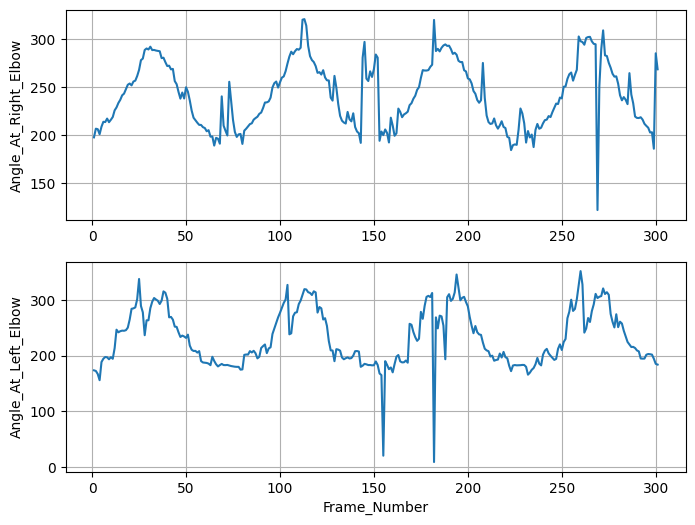

In [109]:
# Assuming df is your DataFrame with 'Frame_Number', 'Angle_At_Right_Elbow', and 'Angle_At_Left_Elbow' columns

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plotting in the first subplot (axs[0])
axs[0].plot(Angles_df['Frame_Number'], Angles_df['Angle_At_Right_Elbow'])
axs[0].set_ylabel('Angle_At_Right_Elbow')  # Label for the first subplot
axs[0].grid(True)

# Plotting in the second subplot (axs[1])
axs[1].plot(Angles_df['Frame_Number'], Angles_df['Angle_At_Left_Elbow'])
axs[1].set_ylabel('Angle_At_Left_Elbow')  # Label for the second subplot
axs[1].set_xlabel('Frame_Number')  # Label for x-axis of the second subplot
axs[1].grid(True)

# Common grid for both subplots
# plt.grid(True)

# Display the plot
plt.show()


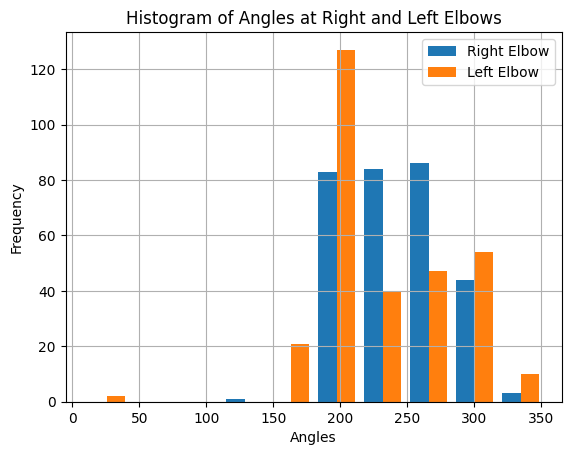

In [110]:
plt.hist([Angles_df['Angle_At_Right_Elbow'], Angles_df['Angle_At_Left_Elbow']], label=['Right Elbow', 'Left Elbow'])
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Histogram of Angles at Right and Left Elbows')
plt.grid(True)
plt.legend()
plt.show()

##Check for outliers and similarity

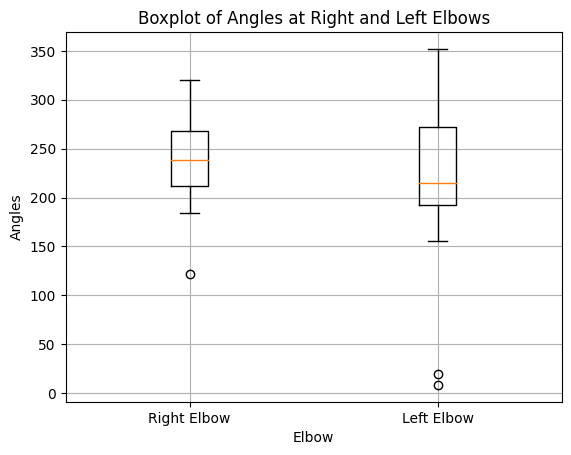

In [111]:
plt.boxplot([Angles_df['Angle_At_Right_Elbow'], Angles_df['Angle_At_Left_Elbow']],labels = ['Right Elbow', 'Left Elbow'])

plt.xlabel('Elbow')
plt.ylabel('Angles')
plt.title('Boxplot of Angles at Right and Left Elbows')

plt.grid(True)
plt.show()

##Normalize data

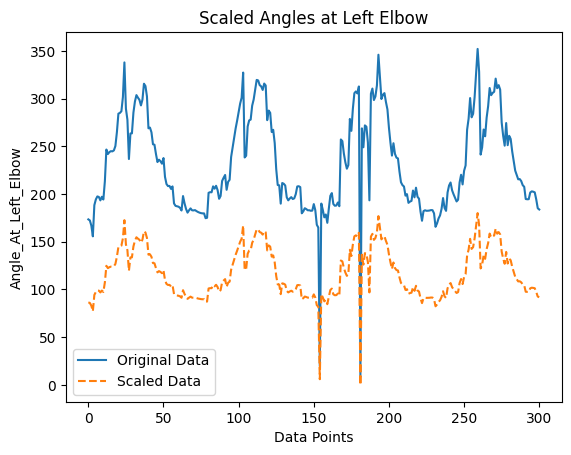

In [112]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a MinMaxScaler object with a custom feature range
scaler = MinMaxScaler(feature_range=(0, 180))  # You can adjust the range as needed

# Assuming 'df' is your DataFrame containing the 'Angle_At_Left_Elbow' column

# Extract the original data and reshape it
original_data = Angles_df['Angle_At_Left_Elbow'].values.reshape(-1, 1)

# Fit the scaler to your original data
scaler.fit(original_data)

# Transform the original data to the desired range
scaled_data = scaler.transform(original_data)

# Plot original data
plt.plot(original_data, label='Original Data')
plt.plot(scaled_data, label='Scaled Data', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Angle_At_Left_Elbow')
plt.title('Scaled Angles at Left Elbow')
plt.legend()
plt.show()


In [113]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow
0,1,197.396033,173.422101
1,2,206.430617,172.320207
2,3,205.903111,166.878380
3,4,200.682754,155.661523
4,5,208.499423,188.353648
...,...,...,...
296,297,202.470076,202.410339
297,298,202.739331,201.719543
298,299,185.602815,194.331287
299,300,284.785541,185.104629


##Save angles data to excel file

In [114]:
file_name = 'angles_data_' + video_path.split('/')[-1] + '.xlsx'

Angles_df.to_excel(dataset_path + '/' + file_name, index=False)

print(f"Data saved to {file_name}")

Data saved to angles_data_PushUp.mp4.xlsx
